## Parte 1: Carregando os dados iniciais e gerando totais

Realiza o carregamento da biblioteca Pandas para analisar o arquivo ```clubes.csv``` contendo os dados relacionados às premiações internacionais dos times selecionados.

Os dados do arquivo ```clubes.csv``` foi levantado em sala de aula, com o auxilio da turma, assim como a seleção dos Clubes selecionados. Os dados coletados foram alimentados em uma tabela do Excel (```clubes.xlsx```) e, posteriormente, exportados para ```csv```, através do próprio Excel.

É importante ressaltar que, para exportar do Excel para ```csv``` de forma compatível com ```utf-8```, é necessário selecionar o tipo ```CSV UTF-8```.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('clubes.CSV', delimiter=';')
display(df)

,Time,2019,2020,2021,2022,2023
0,Flamengo,3,4,2,2,0
1,Fluminense,0,0,0,2,3
2,Palmeiras,0,3,1,3,3
3,Corinthias,1,0,0,0,0
4,Atlético PR,3,1,1,0,1
5,São Paulo,0,0,1,0,1
6,Grêmio,1,0,1,1,1


In [3]:
# Realiza a soma linha por linha e atribui a uma nova coluna chamada Rendimento por Clube com os valores
df['Rendimento por Clube'] = df[df.columns[1:-1]].sum(axis=1)
display(df)

,Time,2019,2020,2021,2022,2023,Rendimento por Clube
0,Flamengo,3,4,2,2,0,11
1,Fluminense,0,0,0,2,3,2
2,Palmeiras,0,3,1,3,3,7
3,Corinthias,1,0,0,0,0,1
4,Atlético PR,3,1,1,0,1,5
5,São Paulo,0,0,1,0,1,1
6,Grêmio,1,0,1,1,1,3


In [4]:
# Realiza a soma coluna por colunas e armazena em uma linha com o nome Rendimento por Ano
aux = list(df.sum()[1:len(df)])
aux.insert(0, 'Rendimento por Ano')

df.loc[len(df)]=aux
display(df)

,Time,2019,2020,2021,2022,2023,Rendimento por Clube
0,Flamengo,3,4,2,2,0,11
1,Fluminense,0,0,0,2,3,2
2,Palmeiras,0,3,1,3,3,7
3,Corinthias,1,0,0,0,0,1
4,Atlético PR,3,1,1,0,1,5
5,São Paulo,0,0,1,0,1,1
6,Grêmio,1,0,1,1,1,3
7,Rendimento por Ano,8,8,6,8,9,30


Após a realização dos somatórios linha/coluna para gerar totais (questões didádicas), realizou-se a exportação dos dados utilizanod o código abaixo.

In [5]:
# Exportar o DataFrame para um arquivo CSV por questões didádicas
df.to_csv('clubes_totalizado.csv', index=False, encoding='utf-8')

## Parte 2: Carregando o Novo Arquivo com Totais

In [6]:
df = pd.read_csv('clubes_totalizado.CSV')
display(df)

,Time,2019,2020,2021,2022,2023,Rendimento por Clube
0,Flamengo,3,4,2,2,0,11
1,Fluminense,0,0,0,2,3,2
2,Palmeiras,0,3,1,3,3,7
3,Corinthias,1,0,0,0,0,1
4,Atlético PR,3,1,1,0,1,5
5,São Paulo,0,0,1,0,1,1
6,Grêmio,1,0,1,1,1,3
7,Rendimento por Ano,8,8,6,8,9,30


### Comparativos com gráficos básicos

In [7]:
# Importação das Bibliotecas para gerar gráficos
import matplotlib.pyplot as plt

In [8]:
# Separação do DataFrame - Só por questão de estudo
rendimentoClube = df.iloc[:-1,1:len(df)-2]
rendimentoAno = df.iloc[-1,1:len(df)-2]

# Variáveis que serão usadas para gerar os gráficos
# Normal
x1 = df['Time'].drop(index=len(df)-1)
y1 = df['Rendimento por Clube'].drop(index=len(df)-1)

# Ordenado
x = df.sort_values(by='Rendimento por Clube', ascending=False, ignore_index=True).drop(index=0)['Time']
y = df.sort_values(by='Rendimento por Clube', ascending=False, ignore_index=True).drop(index=0)['Rendimento por Clube']

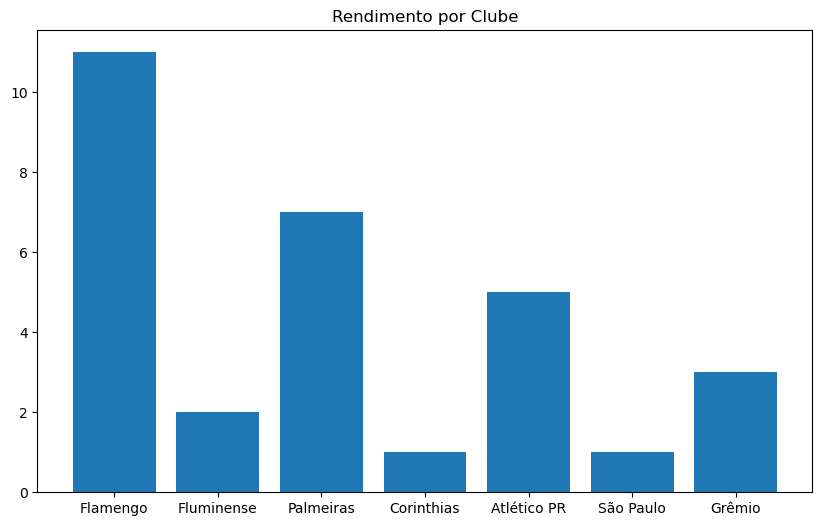

In [9]:
# Plotagem básica
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Rendimento por Clube')
plt.bar(x1, y1);

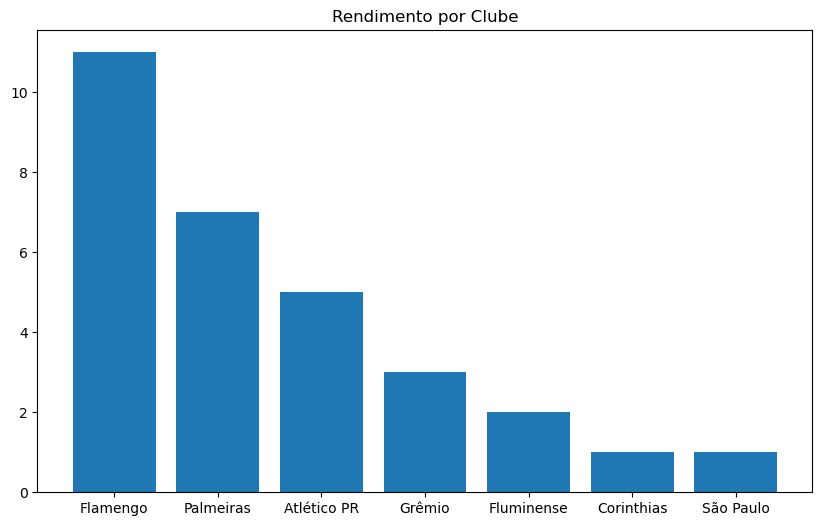

In [10]:
# Plotagem com valores ordenados
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Rendimento por Clube')
plt.bar(x, y);

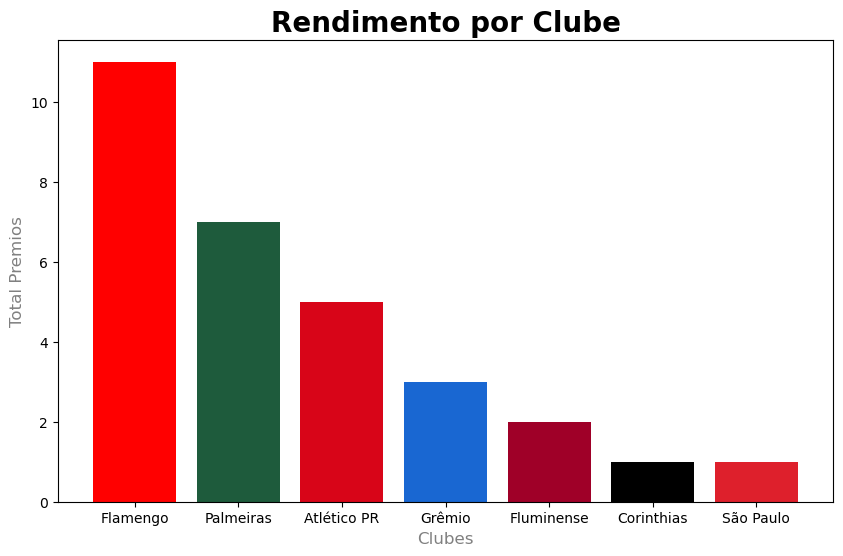

In [11]:
# Plotagem Perfumada
fig, ax = plt.subplots(figsize=(10,6))
cores = ['#FF0000', '#1e5b3c', '#D80518', '#1967D2', '#9F0028', '#000000', '#DE202C']
plt.title('Rendimento por Clube', fontsize=20, color='black', fontweight='bold')
plt.xlabel('Clubes', fontsize='12', color='gray')
plt.ylabel('Total Premios', fontsize='12', color='gray')
plt.bar(x, y,color=cores);

Utilizando o Seaborn para exibição dos gráficos

In [12]:
import seaborn as sns

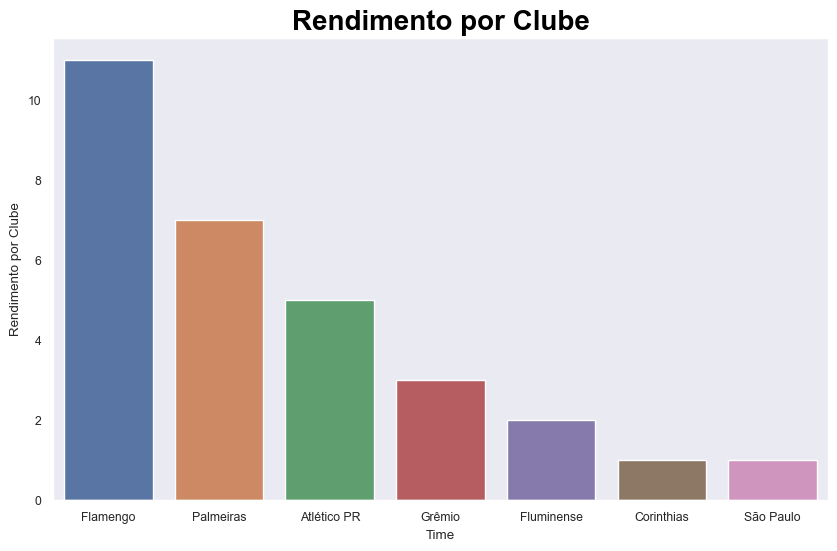

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Rendimento por Clube', fontsize=20, color='black', fontweight='bold')
sns.set_theme()
sns.set_style('dark')
sns.barplot(x=x, y=y);

### Normalização dos Dados